# DataSet

## Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/machima/train/train"  
path_dir = "/content/drive/MyDrive/machima/"  

images	train.csv


In [ ]:
from os import listdir
import pandas as pd
import numpy as np

df    = pd.read_csv(path_dir+"train/train/train.csv")
files = listdir(path_dir+"train/train/images")

In [ ]:
df.tail()

,id,category
1720,245a6e32-55b1-47b9-ad43-527b95c9d770.jpg,0
1721,6e8cf04c-6ce1-4971-8978-0d40094378b8.jpg,0
1722,d6a0e4cb-1b83-4867-b9f8-9759a3ba22b0.jpg,0
1723,d6a4760d-c694-4d30-82a5-196f32ddec64.jpg,1
1724,62a559b3-6b50-468d-bb7a-665ef2fee227.jpg,1


In [ ]:
df["path"] = path_dir+"train/train/images/" + df["id"]
from skimage import io, transform

size   = (255, 255)
images = []
labels = []
i = 0
for path in df["path"]:
    img = io.imread(path)
    img = transform.resize(img, size )
    images.append(img)
    i+= 1
    if i % 100==0:
        print(i)
    #io.imshow(img)
    #io.show()
    #break
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [ ]:
df.head()

,id,category,path
0,6380fb87-18fe-4b76-a085-639a4e01b664.jpg,0,/content/drive/MyDrive/machima/train/train/ima...
1,9956035b-0500-47b7-b508-cc7414c10270.jpg,0,/content/drive/MyDrive/machima/train/train/ima...
2,fa6b4604-a080-410b-a8d1-fdf7cf61a92d.jpg,0,/content/drive/MyDrive/machima/train/train/ima...
3,6e6dc67b-73ba-404b-b685-1f726d0357c3.jpg,0,/content/drive/MyDrive/machima/train/train/ima...
4,15121f8e-f428-4cd5-83bf-1c9a051aea54.jpg,0,/content/drive/MyDrive/machima/train/train/ima...


In [ ]:
Xs = np.array(images)
Xs.shape                             # (1725 , 224, 224, 3)

(1725, 255, 255, 3)

In [ ]:
ys = df["category"].to_numpy()        # (1725,)

In [ ]:
ys[1700:1725]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from skimage import io

def show_most_simm(Xs, fig_row, fig_col, sz=20, show=True):
  
    plt.figure(figsize=(sz,sz))
    plt.imshow(Xs[0])
    
    for i in range(0, ((fig_row * fig_col)+1)):
        try:
            plt.axis('off')
            plt.subplot(fig_row, fig_col, i+1)   
            if len(Xs[i].shape) == 3:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1], Xs[i].shape[2])), cmap="gray")
            else:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1])), cmap="gray")
        except:
            print("Error")
            pass
    if show:
        plt.show()

(array([   0,    1,    2, ..., 1720, 1721, 1722]),)
Error


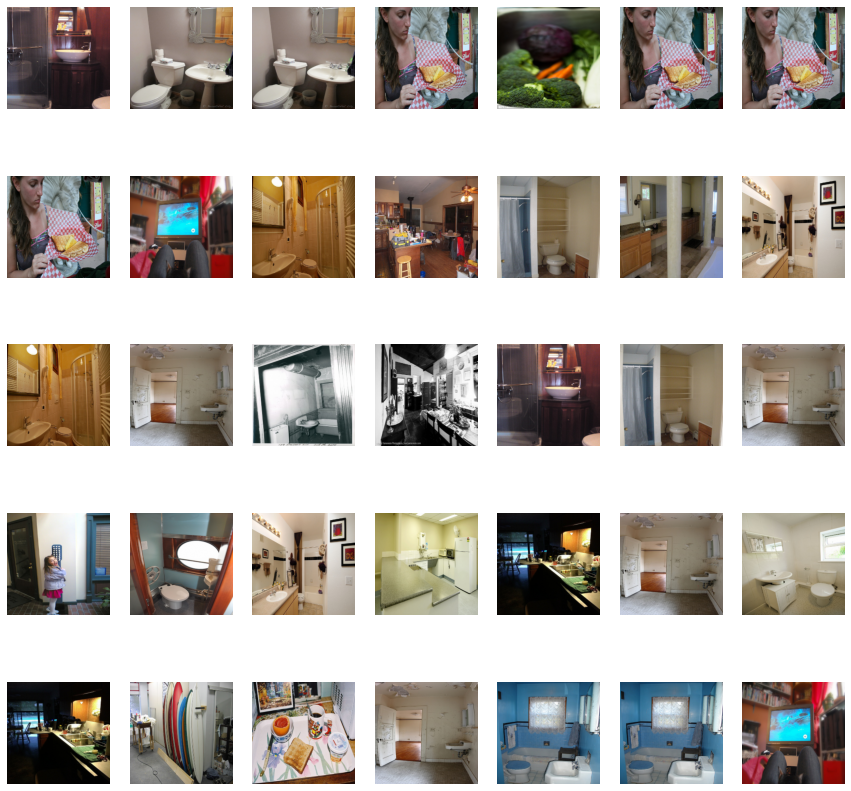

In [ ]:
index0 = np.where(ys==0)
print(index0[:])
x = 0
show_most_simm(Xs[index0][x:x+35], 5, 7, sz=15)

Error


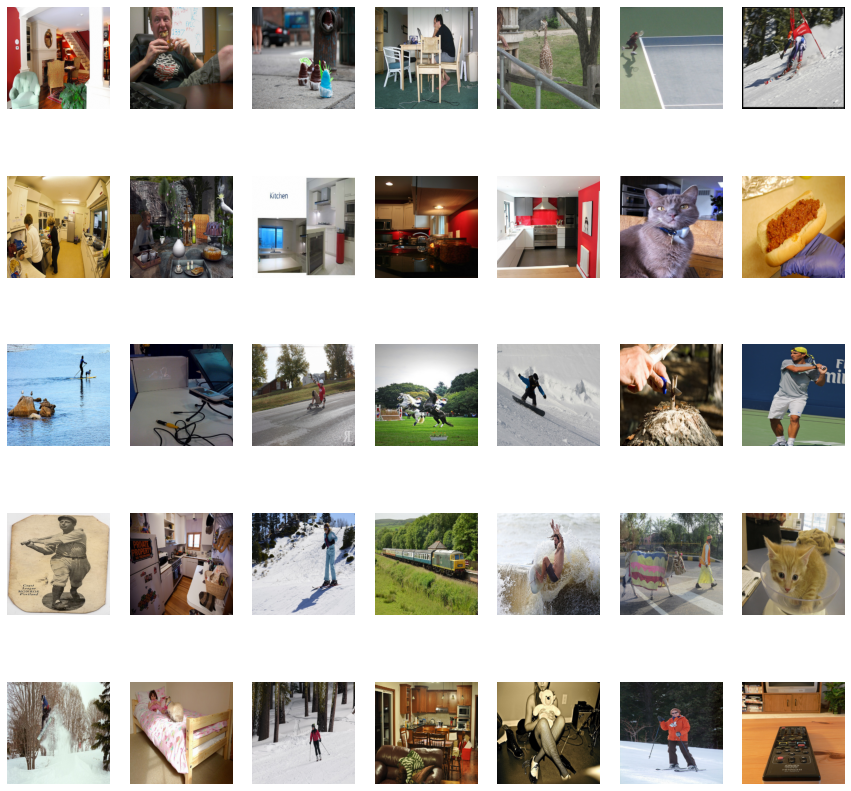

Error


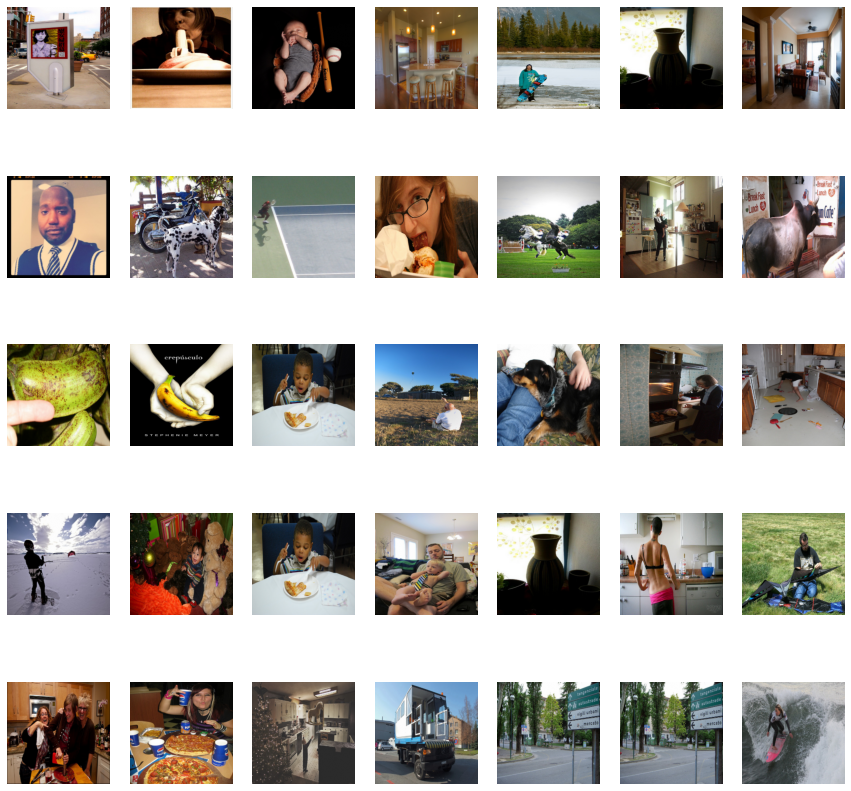

In [ ]:
index1 = np.where(ys==1)
x = 200
show_most_simm(Xs[index1][x:x+35], 5, 7, sz=15)
show_most_simm(Xs[index1], 5, 7, sz=15)

In [ ]:
len(index0[0]), len(index1[0])        

(1317, 408)

## PreProcessing

In [ ]:
# เพิ่ม ​Code

## Augment

In [ ]:
# เพิ่ม Code

## Save dataset file

In [ ]:
def save_dataset(Xs, ys):
    # Xs, ys = read_original_images()
    # Xs, ys = remove_duplicate(Xs)

    np.save(path_dir+"train/Xs224_V2.npy", Xs)
    np.save(path_dir+"train/ys_v2.npy", ys)

In [ ]:
save_dataset(Xs,ys)

## Load Dataset

In [ ]:
def load_dataset():
    return np.load(path_dir+"train/Xs224_V2.npy"), np.load(path_dir+"train/ys_v2.npy")

In [ ]:
XsV1, ysV1 = load_dataset()
XsV1.shape, ysV1.shape         

((1725, 255, 255, 3), (1725,))

# Train Model

## Load NasNet Model

In [ ]:
size = (255, 255)

In [ ]:
import tensorflow as tf

new_input = tf.keras.layers.Input(shape=(size[0],size[1], 3))
model     = tf.keras.applications.NASNetLarge(include_top=False, input_tensor=new_input, weights="imagenet", pooling='max')

outputs   = tf.keras.layers.Dense(2, activation='softmax')(model.output)
model     = tf.keras.Model(new_input, outputs)

model.summary()

## Spit Data  ( train , test )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

random_state = 1
X_train, X_test, y_train, y_test = train_test_split(XsV1, ysV1, test_size=0.2, random_state=random_state,shuffle=True)

In [ ]:
X_train.shape,X_test.shape

((1380, 255, 255, 3), (345, 255, 255, 3))

In [ ]:
y_train.shape                  

(1380,)

In [ ]:
 y_test.shape 

(345,)

In [ ]:
y_trainc = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_testc  = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
y_trainc.shape

(1380, 2)

In [ ]:
y_testc.shape

(345, 2)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_traincc = to_categorical(y_train,2)
y_testcc = to_categorical(y_testc, 2)

## Train model

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(path_dir+"Nasnet_save_v1.h5",monitor='val_loss', verbose=0, save_best_only=True,mode='min'),
]
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, decay=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    x=X_train, y=y_trainc, epochs=20, batch_size=16, callbacks=callbacks, validation_data=(X_test, y_testc)
)


Epoch 1/20
87/87 [==============================] - ETA: 0s - loss: 3.0036 - accuracy: 0.7478

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


87/87 [==============================] - 112s 914ms/step - loss: 3.0036 - accuracy: 0.7478 - val_loss: 15.3196 - val_accuracy: 0.7942
Epoch 2/20
87/87 [==============================] - 74s 853ms/step - loss: 0.3167 - accuracy: 0.8442 - val_loss: 13.2417 - val_accuracy: 0.7942
Epoch 3/20
87/87 [==============================] - 75s 865ms/step - loss: 0.2133 - accuracy: 0.9051 - val_loss: 11.0218 - val_accuracy: 0.7942
Epoch 4/20
87/87 [==============================] - 75s 863ms/step - loss: 0.1251 - accuracy: 0.9478 - val_loss: 8.4523 - val_accuracy: 0.7942
Epoch 5/20
87/87 [==============================] - 63s 730ms/step - loss: 0.0722 - accuracy: 0.9768 - val_loss: 9.0351 - val_accuracy: 0.7971
Epoch 6/20
87/87 [==============================] - 74s 857ms/step - loss: 0.0505 - accuracy: 0.9862 - val_loss: 7.0108 - val_accuracy: 0.7942
Epoch 7/20
87/87 [==============================] - 74s 857ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 4.7123 - val_accuracy: 0.8580
Epoch 

# Validate

In [ ]:
from os import listdir
import pandas as pd
from skimage import io, transform

## Load Val images

In [ ]:
size   = (255, 255)
images = []
labels = []
i = 0

val_df    = pd.read_csv(path_dir+"val/val/val.csv")
val_files = listdir(path_dir+"val/val/images")

val_images = []
for file in val_files:
    img = io.imread(path_dir+"val/val/images/"+file)
    img = transform.resize(img, size )
    val_images.append(img)
    i+= 1
    if i % 100==0:
        print(i)
print(i)        
    #io.imshow(img)
    #io.show()
    #break

100
200
300
398


In [ ]:
val_imgs = np.array(val_images)
val_imgs.shape                    

(398, 255, 255, 3)

## Model Predict

In [ ]:
preds = model.predict(val_imgs)

preds.shape ,preds[:10]                 

((398, 2), array([[9.9824905e-01, 1.7509183e-03],
        [1.0000000e+00, 4.5470529e-25],
        [1.0000000e+00, 5.5856602e-24],
        [1.0000000e+00, 0.0000000e+00],
        [1.0000000e+00, 0.0000000e+00],
        [1.0000000e+00, 6.0114157e-28],
        [1.0000000e+00, 0.0000000e+00],
        [4.1757430e-05, 9.9995828e-01],
        [1.4143923e-03, 9.9858558e-01],
        [1.0000000e+00, 2.4016270e-11]], dtype=float32))

In [ ]:
yp = np.argmax(preds, axis=1)                 
yp.shape, np.sum(yp)                   

((398,), 44)

In [ ]:
x = np.array(val_files)
x.shape                                 

(398,)

## Save Submission

In [ ]:
val_df['id'] = ""
data = {'id': val_files, 'category': yp}  
  
# Create DataFrame  
val_df2 = pd.DataFrame(data)  
  
# Print the output.  
print(val_df2)  

val_df2.to_csv("submission6.csv", index=False)

# Credit

Code Original from  ==> Sarayut Gonwirat (SuperAI2-699)